# Imports

In [72]:
%pip install pandas numpy scikit-learn statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Models    

In [75]:
train_data_condo = pd.read_csv('data/train_data_condo.csv')
train_data_all = pd.read_csv('data/train_data_all.csv')
test_data_condo = pd.read_csv('data/test_data_condo.csv')
test_data_all = pd.read_csv('data/test_data_all.csv')

In [76]:
train_data_condo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Borough                 8000 non-null   int64  
 1   Total Units             8000 non-null   int64  
 2   Age                     8000 non-null   float64
 3   Has Elevator            8000 non-null   int64  
 4   Gross SqFt              8000 non-null   float64
 5   Estimated Gross Income  8000 non-null   float64
 6   Estimated Expense       8000 non-null   float64
 7   Net Operating Income    8000 non-null   float64
 8   Full Market Value       8000 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 562.6 KB


In [77]:
test_data_condo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Borough                 2000 non-null   int64  
 1   Total Units             2000 non-null   int64  
 2   Age                     2000 non-null   float64
 3   Has Elevator            2000 non-null   int64  
 4   Gross SqFt              2000 non-null   float64
 5   Estimated Gross Income  2000 non-null   float64
 6   Estimated Expense       2000 non-null   float64
 7   Net Operating Income    2000 non-null   float64
 8   Full Market Value       2000 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 140.8 KB


In [78]:
target = 'Full Market Value'

X_train_condo = train_data_condo.loc[:, train_data_condo.columns != target]
y_train_condo = train_data_condo[target]
X_test_condo = test_data_condo.loc[:, test_data_condo.columns != target]
y_test_condo = test_data_condo[target]

# Final Models

## Model with condo columns

In [79]:
X_train_condo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Borough                 8000 non-null   int64  
 1   Total Units             8000 non-null   int64  
 2   Age                     8000 non-null   float64
 3   Has Elevator            8000 non-null   int64  
 4   Gross SqFt              8000 non-null   float64
 5   Estimated Gross Income  8000 non-null   float64
 6   Estimated Expense       8000 non-null   float64
 7   Net Operating Income    8000 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 500.1 KB


In [80]:
import statsmodels.api as sm

# Add a constant to the model
X_train_condo_const = sm.add_constant(X_train_condo)

model = sm.OLS(y_train_condo, X_train_condo_const).fit()
predictions = model.predict(X_train_condo_const)
# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Full Market Value   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.114e+05
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        02:25:40   Log-Likelihood:            -1.1441e+05
No. Observations:                8000   AIC:                         2.288e+05
Df Residuals:                    7991   BIC:                         2.289e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.09

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Train the linear regression model
regr = LinearRegression()
regr.fit(X_train_condo, y_train_condo)
y_predicted = regr.predict(X_train_condo)

# Print model details
print('R-squared:\n', regr.score(X_train_condo, y_train_condo))
print('MSE:', metrics.mean_squared_error(y_train_condo, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train_condo, y_predicted)))


R-squared:
 0.9952967057336655
MSE: 154787225334.69592
RMSE: 393430.07680488273


In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["features"] = X_train_condo.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_condo.values, i) for i in range(len(X_train_condo.columns))]

print(vif_data)


                 features           VIF
0                 Borough  2.512684e+00
1             Total Units  9.525310e+00
2                     Age  1.820683e+00
3            Has Elevator  1.443623e+00
4              Gross SqFt  2.036112e+01
5  Estimated Gross Income  3.588526e+13
6       Estimated Expense  4.228732e+12
7    Net Operating Income  1.617091e+13


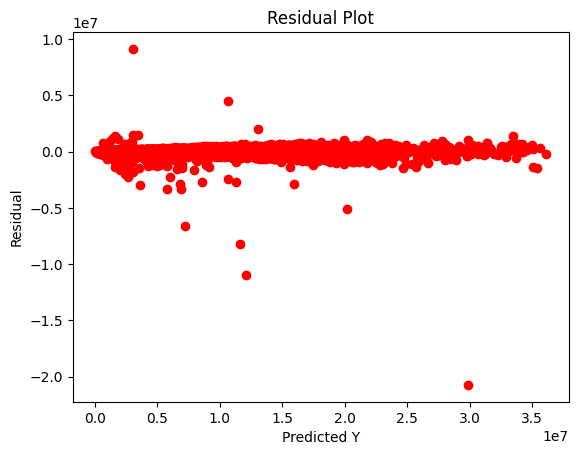

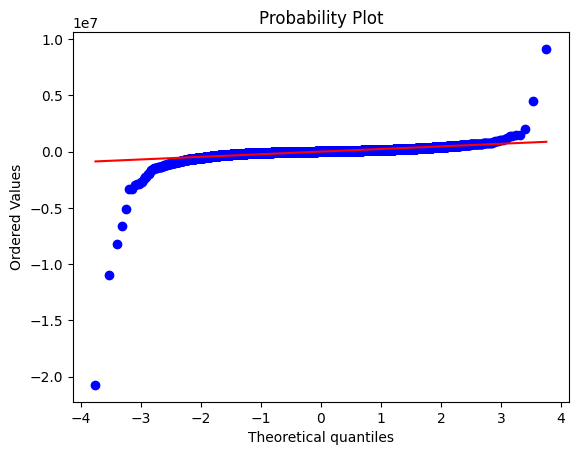

In [83]:
residuals = y_train_condo - predictions
plt.plot(predictions, residuals, 'o', color='red')
plt.title("Residual Plot")
plt.xlabel("Predicted Y")
plt.ylabel("Residual")
plt.show()

# QQ plot for residuals
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


In [84]:
#varaible selection in Python can be done with statsmodels package or with scikit-learn-feature selection package
#Here I show stepwise variable selection using statsmodels

import statsmodels.api as sm

def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.10, 
                           threshold_out = 0.10, 
                           verbose=True):
       
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [85]:
result = stepwise_selection(X_train_condo, y_train_condo)
print('resulting features:')

print(result)


Add  Net Operating Income           with p-value 0.0
Add  Gross SqFt                     with p-value 3.23535e-220
Add  Estimated Gross Income         with p-value 1.30477e-88
Add  Borough                        with p-value 1.20073e-33
Add  Total Units                    with p-value 2.15758e-07
resulting features:
['Net Operating Income', 'Gross SqFt', 'Estimated Gross Income', 'Borough', 'Total Units']


In [86]:
X_train_condo_s = X_train_condo[result]
X_train_condo_s_const = sm.add_constant(X_train_condo_s)

model_s = sm.OLS(y_train_condo, X_train_condo_s_const).fit()
predictions_s = model_s.predict(X_train_condo_s_const)
# Print model summary
print(model_s.summary())


                            OLS Regression Results                            
Dep. Variable:      Full Market Value   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.383e+05
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        02:25:41   Log-Likelihood:            -1.1441e+05
No. Observations:                8000   AIC:                         2.288e+05
Df Residuals:                    7994   BIC:                         2.289e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.14

In [87]:
# Train the linear regression model
regr = LinearRegression()
regr.fit(X_train_condo_s, y_train_condo)
y_predicted_s = regr.predict(X_train_condo_s)

# Print model details
print('R-squared:\n', regr.score(X_train_condo_s, y_train_condo))
print('MSE:', metrics.mean_squared_error(y_train_condo, y_predicted_s))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train_condo, y_predicted_s)))

R-squared:
 0.9952956787814135
MSE: 154821022728.7429
RMSE: 393473.02668511204


In [88]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["features"] = X_train_condo_s.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_condo_s.values, i) for i in range(len(X_train_condo_s.columns))]

print(vif_data)


                 features         VIF
0    Net Operating Income  102.392584
1              Gross SqFt   20.241894
2  Estimated Gross Income  148.082874
3                 Borough    1.930734
4             Total Units    9.521520


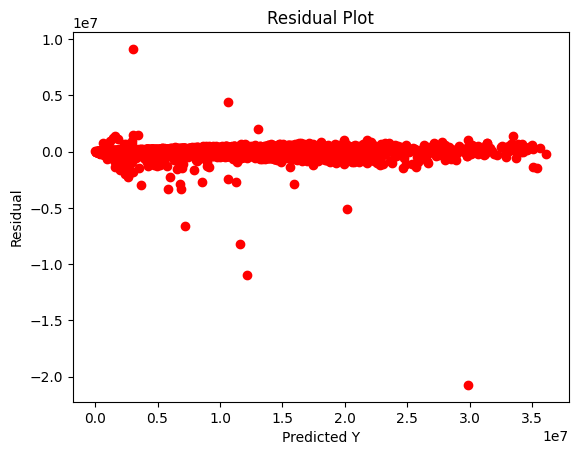

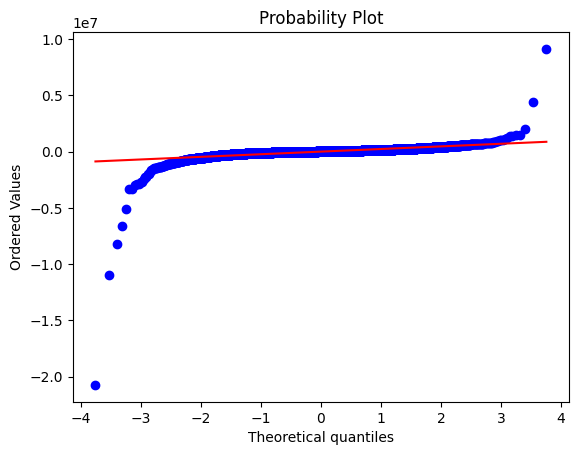

In [89]:
residuals = y_train_condo - predictions_s
plt.plot(predictions_s, residuals, 'o', color='red')
plt.title("Residual Plot")
plt.xlabel("Predicted Y")
plt.ylabel("Residual")
plt.show()

# QQ plot for residuals
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


In [90]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# Apply Box-Cox transformation
y_train_bc = y_train_condo.copy()
y_train_bc, lmbda = boxcox(y_train_bc)
print('Lambda:', lmbda)

Lambda: 0.024068243409553935


In [95]:
X_train_condo_s = X_train_condo[result]
X_train_condo_s_const = sm.add_constant(X_train_condo_s)

model_s = sm.OLS(y_train_bc, X_train_condo_s_const).fit()
predictions_s = inv_boxcox(model_s.predict(X_train_condo_s_const),lmbda)
# Print model summary
print(model_s.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     5795.
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        03:54:55   Log-Likelihood:                -7663.1
No. Observations:                8000   AIC:                         1.534e+04
Df Residuals:                    7994   BIC:                         1.538e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     17

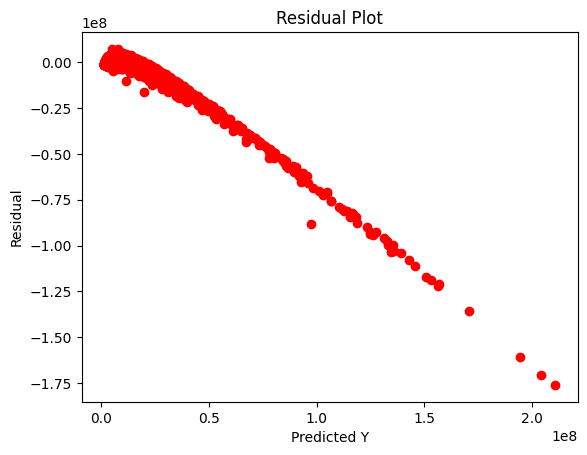

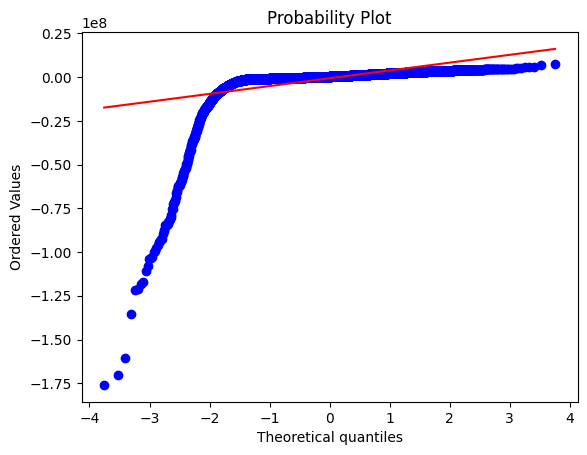

In [99]:
residuals = inv_boxcox(y_train_bc,lmbda) - predictions_s
plt.plot(predictions_s, residuals, 'o', color='red')
plt.title("Residual Plot")
plt.xlabel("Predicted Y")
plt.ylabel("Residual")
plt.show()

stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


## Market Value with 3 similar apartment data

In [28]:
X_train_all = train_data_all.loc[:, train_data_all.columns != target]
y_train_all = train_data_all[target]
X_test_all = test_data_all.loc[:, test_data_all.columns != target]
y_test_all = test_data_all[target]

In [32]:
import statsmodels.api as sm

# Add a constant to the model
X_train_all_const = sm.add_constant(X_train_all)
model_all = sm.OLS(y_train_all, X_train_all_const).fit()
predictions_all = model_all.predict(X_train_all_const)
# Print model summary
print(model_all.summary())


                            OLS Regression Results                            
Dep. Variable:      Full Market Value   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.386e+04
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        01:24:15   Log-Likelihood:            -1.1432e+05
No. Observations:                8000   AIC:                         2.287e+05
Df Residuals:                    7967   BIC:                         2.289e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Train the linear regression model
regr = LinearRegression()
regr.fit(X_train_all, y_train_all)
y_predicted = regr.predict(X_train_all)

# Print model details
print('R-squared:\n', regr.score(, y_train_all))
print('MSE:', metrics.mean_squared_error(y_train_all, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train_all, y_predicted)))


R-squared:
 0.9953988339259612
MSE: 151426147201.2145
RMSE: 389135.1271746288


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["features"] = X_train_all.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_all.values, i) for i in range(len(X_train_all.columns))]

print(vif_data)


c:\Users\youss\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                    features           VIF
0                    Borough           inf
1                Total Units  9.997692e+00
2                        Age  3.267399e+00
3               Has Elevator  3.000239e+00
4                 Gross SqFt  4.818658e+01
5     Estimated Gross Income  3.602880e+13
6          Estimated Expense  4.244674e+12
7       Net Operating Income  1.622919e+13
8                  Borough 1           inf
9              Total Units 1  7.070255e+00
10                     Age 1  6.743415e+00
11            Has Elevator 1  2.144258e+01
12              Gross SqFt 1  5.160370e+01
13  Estimated Gross Income 1  3.373483e+13
14       Estimated Expense 1  4.137436e+12
15    Net Operating Income 1  1.496213e+13
16       Full Market Value 1  1.472139e+01
17                 Borough 2           inf
18             Total Units 2  1.211117e+01
19                     Age 2  8.009376e+00
20            Has Elevator 2  2.443863e+01
21              Gross SqFt 2  5.609056e+01
22  Estimat

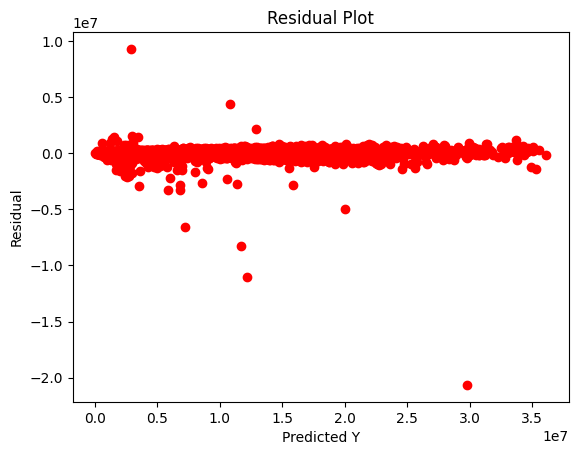

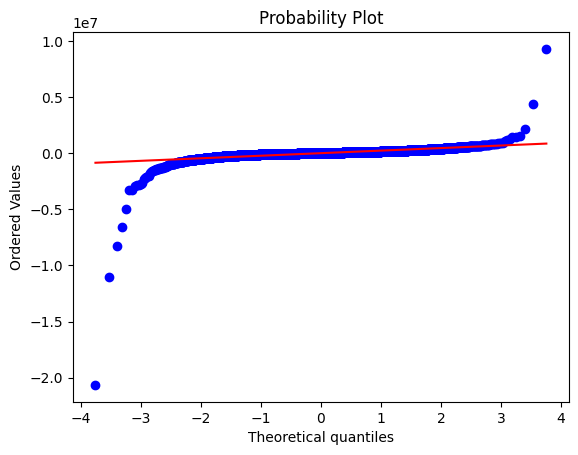

In [36]:
residuals = y_train_all - y_predicted
plt.plot(y_predicted, residuals, 'o', color='red')
plt.title("Residual Plot")
plt.xlabel("Predicted Y")
plt.ylabel("Residual")
plt.show()

# QQ plot for residuals
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


In [37]:
result_all = stepwise_selection(X_train_all, y_train_all)
print('resulting features:')

print(result_all)


Add  Estimated Gross Income 3       with p-value 0.0
Add  Net Operating Income 1         with p-value 0.0
Add  Gross SqFt                     with p-value 0.0
Add  Gross SqFt 1                   with p-value 0.0
Add  Net Operating Income           with p-value 0.0
Drop Gross SqFt 1                   with p-value 0.976546
Add  Estimated Gross Income         with p-value 1.02442e-84
Add  Borough 2                      with p-value 1.02661e-32
Add  Borough                        with p-value 1.02661e-32
Add  Borough 1                      with p-value 1.02661e-32
Add  Borough 3                      with p-value 1.02661e-32
Add  Total Units                    with p-value 5.58974e-07
Add  Age 1                          with p-value 6.41206e-06
Add  Has Elevator 1                 with p-value 7.0277e-10
Drop Estimated Gross Income 3       with p-value 0.396061
Add  Age 2                          with p-value 0.000511874
Add  Total Units 2                  with p-value 0.00596296
Add  Estima

In [39]:
X_train_all_s = X_train_all[result_all]
X_train_all_s_const = sm.add_constant(X_train_all_s)

model_all_s = sm.OLS(y_train_all, X_train_all_s_const).fit()
predictions_s = model_all_s.predict(X_train_all_s_const)
# Print model summary
print(model_all_s.summary())


                            OLS Regression Results                            
Dep. Variable:      Full Market Value   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.073e+05
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        01:27:39   Log-Likelihood:            -1.1435e+05
No. Observations:                8000   AIC:                         2.287e+05
Df Residuals:                    7983   BIC:                         2.288e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.09

In [40]:
# Train the linear regression model
regr = LinearRegression()
regr.fit(X_train_all_s, y_train_all)
y_predicted_all_s = regr.predict(X_train_all_s)

# Print model details
print('R-squared:\n', regr.score(X_train_all_s, y_train_all))
print('MSE:', metrics.mean_squared_error(y_train_all, y_predicted_all_s))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train_all, y_predicted_all_s)))

R-squared:
 0.9953737194642099
MSE: 152252673807.91055
RMSE: 390195.68655728444


In [41]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["features"] = X_train_all_s.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_all_s.values, i) for i in range(len(X_train_all_s.columns))]

print(vif_data)

c:\Users\youss\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                  features         VIF
0   Net Operating Income 1    4.582717
1               Gross SqFt   33.312318
2     Net Operating Income  135.716732
3   Estimated Gross Income  222.831818
4                Borough 2         inf
5                  Borough         inf
6                Borough 1         inf
7                Borough 3         inf
8              Total Units    9.710608
9                    Age 1    6.400931
10          Has Elevator 1   19.213380
11                   Age 2    7.645801
12           Total Units 2   11.146534
13     Estimated Expense 2   22.558867
14            Gross SqFt 2   33.202757
15          Has Elevator 2   18.232707
16            Has Elevator    2.922619
17                     Age    3.003627
18                   Age 3    7.542477


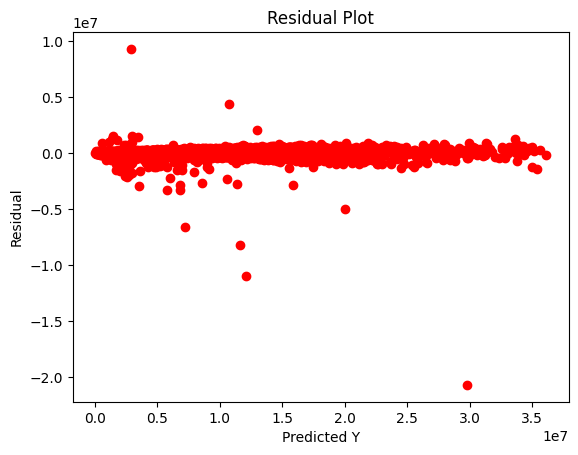

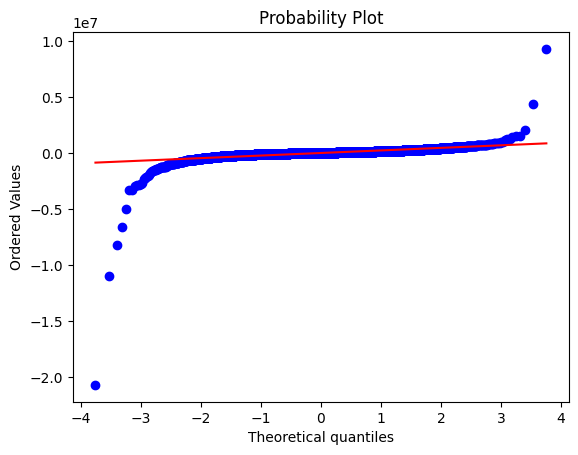

In [42]:
residuals = y_train_all - predictions_s
plt.plot(predictions_s, residuals, 'o', color='red')
plt.title("Residual Plot")
plt.xlabel("Predicted Y")
plt.ylabel("Residual")
plt.show()

# QQ plot for residuals
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


# Testing final models

In [ ]:
# test model_s and model_all_s
X_test_all_s = X_test_all[result_all]
X_test_all_s_const = sm.add_constant(X_test_all_s)
